# Hamiltonian

In [10]:
#Laod current hamiltonian file
using LinearAlgebra, Plots
include("../src/hamiltonian.jl")

add_onsite_disorder (generic function with 1 method)

In [20]:
L   = 100 # number of sites
σ   = .2   # disorder
t   = 0.5 # hopping
E   = 2   # on-site energy
ham = simple_hamiltonian(L, t, σ, E);


In [21]:
#Spectrum
evals_list, evecs_list = eigen(ham);

#evals_list[1:10]
typeof(evecs_list)
evecs_list
size(evecs_list)

(100, 100)

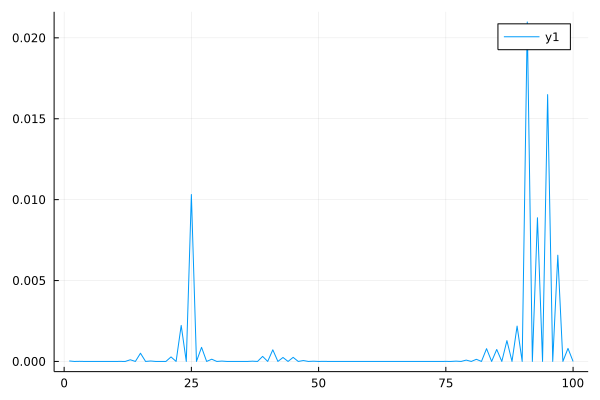

In [22]:
# Look at eigenvector
plot_inst = plot(1:L, abs.(evecs_list[:,8]).^4 )

#plot!(1:L, abs.(evecs_list[:,2]) ) 

plot_inst

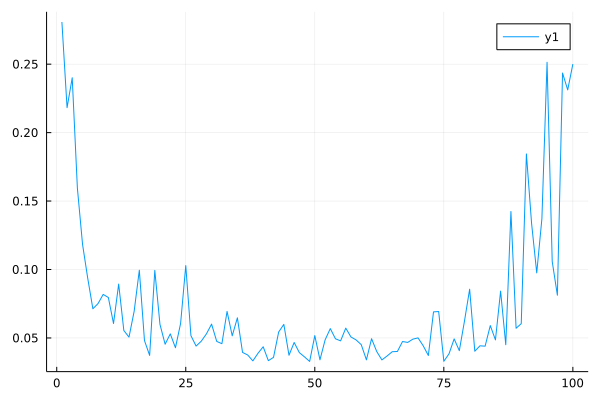

In [25]:
# plot ipr for some eigenstates
include("/Users/mrampp/Github/PKS_Julia_Hackathon/src/observables.jl")
ipr = inverse_participation_ratio(evecs_list)
#ipr
plot_ipr = plot(1:L, ipr )

plot_ipr

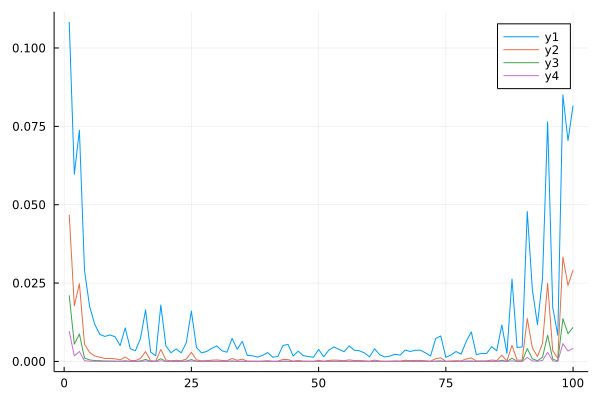

In [28]:
# plot further wavefunction moments
mom1 = wavefunction_moment(3,evecs_list)
plot_moments = plot(1:L, mom1 )
for q in 4:6
    mom_new = wavefunction_moment(q,evecs_list)
    plot!(1:L,mom_new)
end

plot_moments